In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/data1.csv')
data.head()

数据时间    总有功功率（kw）
0  2018/1/1 00:00:00  244033.7682
1  2018/1/1 00:15:00  232720.6402
2  2018/1/1 00:30:00  231685.6891
3  2018/1/1 00:45:00  227581.3317
4  2018/1/1 01:00:00  233482.4269

In [3]:
import datetime
date_list = []
year_list = []
day_list = []
month_list = []
time_node_list = []
index_list = []
for idx,item in enumerate(data['数据时间']):
    a = str.split(item, ' ')
    b = str.split(a[0], '/')
    b = list(map(int, b))
    c = str.split(a[1], ':')
    c = list(map(int, c))
    date = datetime.datetime(b[0],b[1],b[2],c[0],c[1])
    index = datetime.date(b[0],b[1],b[2])
    date_list.append(date)
    year_list.append(b[0])
    month_list.append(b[1])
    day_list.append(b[2])
    time_node_list.append(int(c[0]*4+c[1]/15))
    index_list.append(index)
    
data['时间'] = date_list
data['年份'] = year_list
data['月份'] = month_list
data['天'] = day_list
data['节点'] = time_node_list
data['日期索引'] =  index_list
data.drop(columns=['数据时间'],inplace=True)
data.head()

总有功功率（kw）                  时间    年份  月份  天  节点        日期索引
0  244033.7682 2018-01-01 00:00:00  2018   1  1   0  2018-01-01
1  232720.6402 2018-01-01 00:15:00  2018   1  1   1  2018-01-01
2  231685.6891 2018-01-01 00:30:00  2018   1  1   2  2018-01-01
3  227581.3317 2018-01-01 00:45:00  2018   1  1   3  2018-01-01
4  233482.4269 2018-01-01 01:00:00  2018   1  1   4  2018-01-01

In [4]:
data1 = data.groupby(by='年份').agg('count')
data1.iloc[:,1]

年份
2018    35040
2019    34976
2020    35115
2021    23025
Name: 时间, dtype: int64

事实上我们知道每天的记录数目应该为96$(4\times 24)$条，这里继续查看缺失数据的天数

In [5]:
data2 = data.groupby(by=['年份','月份','天']).agg('count')
df = data2[data2.iloc[:,1]<96].iloc[:,1].sort_values()
df


年份    月份  天 
2021  2   23    12
      4   26    21
      2   27    29
2019  6   14    33
2021  2   25    61
2020  10  20    75
2021  8   9     84
      2   16    89
          24    93
      5   3     93
          1     93
      4   27    94
          28    94
          29    94
          30    94
      5   2     94
      1   27    94
      2   26    95
          28    95
2019  6   15    95
Name: 时间, dtype: int64

查看一下缺失比较严重的2021-02-23,2021-04-26,2021-02-27的具体数据情况

In [6]:
except_date = [datetime.date(2021,2,23), datetime.date(2021,4,26),datetime.date(2021,2,27)]
except_list = []
for i in range(data.shape[0]):
    if data['时间'][i].date() in except_date:
        except_list.append(i)
data.iloc[except_list,:]

总有功功率（kw）                  时间    年份  月份   天  节点        日期索引
110210  166521.0385 2021-02-23 00:00:00  2021   2  23   0  2021-02-23
110211  155361.4569 2021-02-23 00:15:00  2021   2  23   1  2021-02-23
110212  153924.0044 2021-02-23 00:30:00  2021   2  23   2  2021-02-23
110213  155666.9447 2021-02-23 00:45:00  2021   2  23   3  2021-02-23
110214  168366.9385 2021-02-23 01:00:00  2021   2  23   4  2021-02-23
110215  151415.1030 2021-02-23 01:15:00  2021   2  23   5  2021-02-23
110216  149400.9302 2021-02-23 01:30:00  2021   2  23   6  2021-02-23
110217  144571.8399 2021-02-23 01:45:00  2021   2  23   7  2021-02-23
110218  163824.5969 2021-02-23 02:00:00  2021   2  23   8  2021-02-23
110219  141292.9141 2021-02-23 02:15:00  2021   2  23   9  2021-02-23
110220  142068.6094 2021-02-23 02:30:00  2021   2  23  10  2021-02-23
110221  139527.5961 2021-02-23 02:45:00  2021   2  23  11  2021-02-23
110471  178370.3108 2021-02-27 00:00:00  2021   2  27   0  2021-02-27
110472  167448.8655 2021-02-27 00:15:00  2021   2  27   1  2021-02-27
110473  168855.4277 2021-02-27 00:30:00  2021   2  27   2  2021-02-27
110474  167966.8256 2021-02-27 00:45:00  2021   2  27   3  2021-02-27
110475  182472.4828 2021-02-27 01:00:00  2021   2  27   4  2021-02-27
110476  164987.4757 2021-02-27 01:15:00  2021   2  27   5  2021-02-27
110477  163546.1476 2021-02-27 01:30:00  2021   2  27   6  2021-02-27
110478  162673.3973 2021-02-27 01:45:00  2021   2  27   7  2021-02-27
110479  176131.0054 2021-02-27 02:00:00  2021   2  27   8  2021-02-27
110480  161693.8166 2021-02-27 02:15:00  2021   2  27   9  2021-02-27
110481  158465.3853 2021-02-27 02:30:00  2021   2  27  10  2021-02-27
110482  160298.5745 2021-02-27 02:45:00  2021   2  27  11  2021-02-27
110483  173512.7950 2021-02-27 03:00:00  2021   2  27  12  2021-02-27
110484  157105.3929 2021-02-27 03:15:00  2021   2  27  13  2021-02-27
110485  156369.0829 2021-02-27 03:30:00  2021   2  27  14  2021-02-27
110486  154673.2090 2021-02-27 03:45:00  2021   2  27  15  2021-02-27
110487  170112.6846 2021-02-27 04:00:00  2021   2  27  16  2021-02-27
110488  154223.1988 2021-02-27 04:15:00  2021   2  27  17  2021-02-27
...             ...                 ...   ...  ..  ..  ..         ...
110491  168555.8467 2021-02-27 05:00:00  2021   2  27  20  2021-02-27
110492  155243.2872 2021-02-27 05:15:00  2021   2  27  21  2021-02-27
110493  153373.5341 2021-02-27 05:30:00  2021   2  27  22  2021-02-27
110494  154305.1380 2021-02-27 05:45:00  2021   2  27  23  2021-02-27
110495  171289.0654 2021-02-27 06:00:00  2021   2  27  24  2021-02-27
110496  156271.9918 2021-02-27 06:15:00  2021   2  27  25  2021-02-27
110497  157332.4217 2021-02-27 06:30:00  2021   2  27  26  2021-02-27
110498  158754.8556 2021-02-27 06:45:00  2021   2  27  27  2021-02-27
110499  173407.1085 2021-02-27 07:00:00  2021   2  27  28  2021-02-27
115971  210133.7971 2021-04-26 00:00:00  2021   4  26   0  2021-04-26
115972  144129.3749 2021-04-26 19:00:00  2021   4  26  76  2021-04-26
115973  187604.1780 2021-04-26 19:15:00  2021   4  26  77  2021-04-26
115974  166725.2727 2021-04-26 19:30:00  2021   4  26  78  2021-04-26
115975   32940.4734 2021-04-26 19:45:00  2021   4  26  79  2021-04-26
115976  209168.6784 2021-04-26 20:00:00  2021   4  26  80  2021-04-26
115977  184836.9966 2021-04-26 20:15:00  2021   4  26  81  2021-04-26
115978  161120.1969 2021-04-26 20:30:00  2021   4  26  82  2021-04-26
115979   68078.8230 2021-04-26 20:45:00  2021   4  26  83  2021-04-26
115980  210338.1321 2021-04-26 21:00:00  2021   4  26  84  2021-04-26
115981  209076.4455 2021-04-26 21:15:00  2021   4  26  85  2021-04-26
115982  148919.6709 2021-04-26 21:30:00  2021   4  26  86  2021-04-26
115983  182576.7654 2021-04-26 21:45:00  2021   4  26  87  2021-04-26
115984  190586.0249 2021-04-26 22:00:00  2021   4  26  88  2021-04-26
115985  199467.3378 2021-04-26 22:15:00  2021   4  26  89  2021-04-26
115986  201336.4077 2021-04-26 22:30:00  2021   4  26  90  2021-04-26
115987  174365.0295 

通过观察可以发现2021-02-23从凌晨2:45之后开始缺失数据,2021-04-26从凌晨开始缺失到晚上19:00

需要对特殊值进行插值处理,得到连续的电力数据,其中针对不同的缺失情况利用如下缺失值处理方式,对于2个点的直接用前后3个时间点的均值处理,对于连续两个点的数据计算其该点前后7天同一时间前后3个时间点的均值处理

将数据转化成以日期索引为索引，具有96个节点的载荷量信息，包含月份、年份、天等信息的数据格式

In [7]:
cols = []
for i in range(96):
    cols.append('节点'+str(i)+'功率')
handle_data = pd.DataFrame(columns=cols)
handle_data.head()

Empty DataFrame
Columns: [节点0功率, 节点1功率, 节点2功率, 节点3功率, 节点4功率, 节点5功率, 节点6功率, 节点7功率, 节点8功率, 节点9功率, 节点10功率, 节点11功率, 节点12功率, 节点13功率, 节点14功率, 节点15功率, 节点16功率, 节点17功率, 节点18功率, 节点19功率, 节点20功率, 节点21功率, 节点22功率, 节点23功率, 节点24功率, 节点25功率, 节点26功率, 节点27功率, 节点28功率, 节点29功率, 节点30功率, 节点31功率, 节点32功率, 节点33功率, 节点34功率, 节点35功率, 节点36功率, 节点37功率, 节点38功率, 节点39功率, 节点40功率, 节点41功率, 节点42功率, 节点43功率, 节点44功率, 节点45功率, 节点46功率, 节点47功率, 节点48功率, 节点49功率, 节点50功率, 节点51功率, 节点52功率, 节点53功率, 节点54功率, 节点55功率, 节点56功率, 节点57功率, 节点58功率, 节点59功率, 节点60功率, 节点61功率, 节点62功率, 节点63功率, 节点64功率, 节点65功率, 节点66功率, 节点67功率, 节点68功率, 节点69功率, 节点70功率, 节点71功率, 节点72功率, 节点73功率, 节点74功率, 节点75功率, 节点76功率, 节点77功率, 节点78功率, 节点79功率, 节点80功率, 节点81功率, 节点82功率, 节点83功率, 节点84功率, 节点85功率, 节点86功率, 节点87功率, 节点88功率, 节点89功率, 节点90功率, 节点91功率, 节点92功率, 节点93功率, 节点94功率, 节点95功率]
Index: []

[0 rows x 96 columns]

In [8]:
for date in data['日期索引'].unique():
    time_node_val = np.zeros(96)
    temp_df = data[data['日期索引'] == date]
    for node,val in zip(temp_df['节点'].values, temp_df['总有功功率（kw）'].values):
        time_node_val[node] = val
    handle_data.loc[date] = time_node_val
print(handle_data.shape)    
handle_data.head()

(1339, 96)


节点0功率        节点1功率        节点2功率        节点3功率        节点4功率  \
2018-01-01  244033.7682  232720.6402  231685.6891  227581.3317  233482.4269   
2018-01-02  207655.1990  200673.8192  199179.7267  199204.4665  213530.4627   
2018-01-03  248503.4810  236440.6647  233974.9909  232474.0213  235308.6404   
2018-01-04  253310.1506  244545.2255  239774.3340  242000.7265  245132.8146   
2018-01-05  251749.1014  243126.3908  239751.1917  238086.1316  242231.9352   

                  节点5功率        节点6功率        节点7功率        节点8功率        节点9功率  \
2018-01-01  224464.7554  223881.3222  221522.7156  228138.5805  220047.4568   
2018-01-02  192532.5988  188883.3155  188022.8548  194513.1024  187211.6824   
2018-01-03  231016.0498  230976.8460  226422.5222  233703.3045  227215.1967   
2018-01-04  236083.3085  236025.2417  233812.6096  242392.4277  229510.9984   
2018-01-05  234582.4407  234513.2381  231791.2725  236081.0479  227392.3428   

               ...            节点86功率       节点87功率       节点88功率       节点89功率  \
2018-01-01     ...       234535.8695  232184.9459  238362.0286  228433.3587   
2018-01-02     ...       269290.6416  267889.5761  271585.0201  263482.9724   
2018-01-03     ...       274789.8773  274039.4817  280565.2247  289556.1424   
2018-01-04     ...       271083.3414  269644.6551  278659.1120  268758.0021   
2018-01-05     ...       276483.8019  281264.4793  283348.3320  272798.8725   

                 节点90功率       节点91功率       节点92功率       节点93功率       节点94功率  \
2018-01-01  224915.6451  222615.9423  225228.9648  213662.3933  209709.2317   
2018-01-02  260430.3031  268515.5360  260295.6097  270992.1341  250472.5514   
2018-01-03  266657.4444  264818.1174  268641.5741  255383.4266  253372.3768   
2018-01-04  264407.4489  263243.3501  266465.7950  255016.3169  252476.5852   
2018-01-05  271016.2719  266879.9107  271510.8157  257809.0623  253594.7963   

                 节点95功率  
2018-01-01  205839.6378  
2018-01-02  244224.2000  
2018-01-03  247607.8786  
2018-01-04  246234.4829  
2018-01-05  252019.4440  

[5 rows x 96 columns]

根据缺失值信息,针对具有离散的2个缺失值的点进行KNN插值,对于达到3个及以上的连续缺失值采用十字前后插值法

连续3个以上缺失值的区域有如下
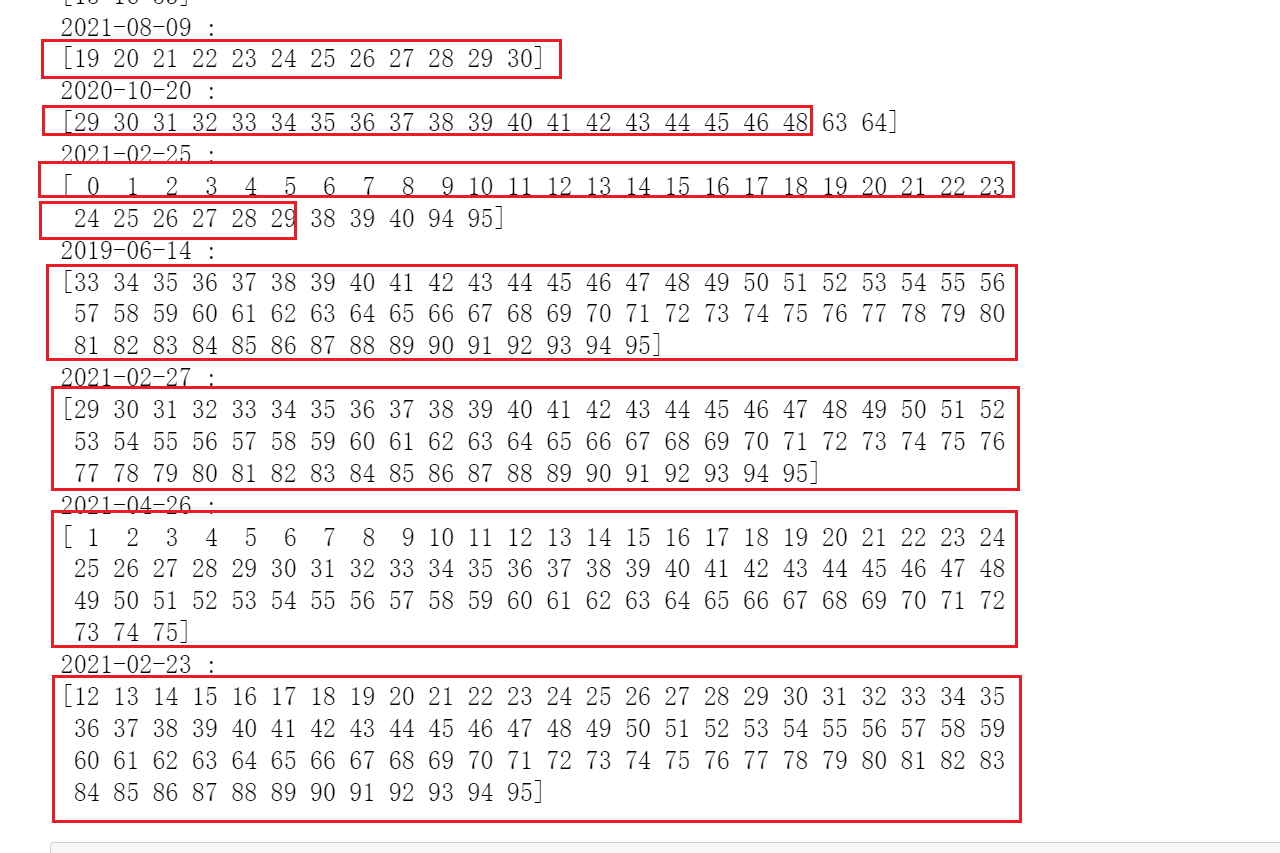


In [9]:
# 针对第一类进行前后均值处理
except_node = [datetime.date(2019,6,15),datetime.date(2021,4,27),datetime.date(2021,4,28),datetime.date(2021,4,29),
               datetime.date(2021,4,30),datetime.date(2021,5,2),datetime.date(2021,1,27),datetime.date(2021,2,26), 
               datetime.date(2021,2,28),datetime.date(2021,2,16),datetime.date(2021,2,24),datetime.date(2021,5,3),
               datetime.date(2021,5,1),datetime.date(2021,2,23),datetime.date(2021,2,25),datetime.date(2021,2,27),
               datetime.date(2021,8,9),datetime.date(2020,10,20),datetime.date(2019,6,14),datetime.date(2021,4,26)]
except_index = {}
# 观察到6/15,2/26,2/28这几天的缺失情况都是在节点0缺失,此时需要考虑前一天的情况
for item in except_node:
    val = handle_data.loc[item].values
    index = np.argwhere(val==0).reshape(1,-1).flatten()
    except_index.update({item: index})
    print(item, ":")
    print(index)

2019-06-15 :
[0]
2021-04-27 :
[15 53]
2021-04-28 :
[15 53]
2021-04-29 :
[15 53]
2021-04-30 :
[15 53]
2021-05-02 :
[17 53]
2021-01-27 :
[28 32]
2021-02-26 :
[0]
2021-02-28 :
[0]
2021-02-16 :
[12 36 43 65 86 91 93]
2021-02-24 :
[ 0 94 95]
2021-05-03 :
[15 16 53]
2021-05-01 :
[15 16 53]
2021-02-23 :
[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90 91 92 93 94 95]
2021-02-25 :
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 38 39 40 94 95]
2021-02-27 :
[29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
2021-08-09 :
[19 20 21 22 23 24 25 26 27 28 29 30]
2020-10-20 :
[29 30 31 32 33 34 35 36 37 38 39 40 41 42

首先针对缺失数目较少的点进行KNN插值处理

* 由于电力的载荷符合一定规律,对于缺失较少的点匹配到载荷曲线差不多的地方,比较合理
* 对于缺失较多的点本来利用的点就比较少,故与其样本近似的情况不太好衡量整个样本的曲线载荷

综上，对缺失值少采用KNN插值，对缺失值多的采用十字前后插补法

In [10]:
# 首先筛选出没有缺失值的情况的样本作为KNN的基础
impute_data = handle_data[[item not in except_node for item in handle_data.index]]
impute_data.shape
# 可以看到插值数据晒掉了20个具有缺失值的数据,比较合理

(1319, 96)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
scaler = StandardScaler()
import warnings
warnings.filterwarnings('ignore')

impute_node = except_node[:13]

# 将缺失值较少的date选出,利用KNN进行插值
# 针对impute_node中的每一个节点进行插值
# 看了一下个别点如2019-06-15的数据,其它的节点由于超出3sigma法则外,其视为异常点
# 故考虑在后续将其作为异常点剔除/处理,在缺失值处理时先不考虑
for item in impute_node:
    impute_data.loc[item] = handle_data.loc[item]
    impute_data.replace(0,np.nan,inplace=True)
    impute_data_val = scaler.fit_transform(impute_data.values)

    imputed_all_data = imputer.fit_transform(impute_data_val)
    imputed_all_data = scaler.inverse_transform(imputed_all_data)
    imputed_node_data = imputed_all_data[-1,:]
    handle_data.loc[item] = imputed_node_data


进行十字前后插值法时，可以观察到2021-2-23,2021-2-25,2021-2-27这几天连在一起,这个时候,准备调整策略进行插值处理,具体处理如下

* 针对2-23选取2021-2-22,2021-2-24,2020-2-22,2020-2-24,2019-2-22,2019-2-24，2018-2-22,2018-2-24各个点的均值作为填充
* 针对2-25选取2021-2-24,2021-2-26,2020-2-24,2020-2-26,2019-2-24,2019-2-26，2018-2-24,2018-2-26各个点的均值作为填充
* 针对2-27选取2021-2-26,2021-2-28,2020-2-26,2020-2-28,2019-2-26,2019-2-28，2018-2-26,2018-2-28各个点的均值作为填充

针对2021-8-9,2020-10-20,2019-6-14,2021-4-26这几天直接采用十字前后插值法,即选取前后3天(一周)的缺失点周围3个点的均值作为填充

In [12]:
# 将KNN插值后的数据作为新的一轮数据
impute_node_rest_list = [datetime.date(2021,2,23),datetime.date(2021,2,25),datetime.date(2021,2,27),
                         datetime.date(2021,8,9),datetime.date(2020,10,20),
                         datetime.date(2019,6,14),datetime.date(2021,4,26)]

impute_data2 = handle_data[[item not in impute_node_rest_list for item in handle_data.index]]
impute_data2.shape

(1332, 96)

In [13]:
# 针对第一种情况2021-2-23,2021-2-25,2021-2-27选取最近几年数据进行均值插值
impute_node_rest1 = impute_node_rest_list[:3]
for item in impute_node_rest1:
    year,month,day = item.year,item.month,item.day
    mean_node_list = []
    # 将2018-2021对应的数据都加入
    for j in range(0,4):
        mean_node_list.append(datetime.date(year-j,month,day-1))
        mean_node_list.append(datetime.date(year-j,month,day+1))
    for index in except_index[item]:
        mean_data_list = [handle_data.loc[i][index] for i in mean_node_list]
        mean_data = np.mean(mean_data_list)
        handle_data.loc[item][index] = mean_data

In [14]:
# 针对第二种情况2021-8-9,2020-10-20,2019-6-14,2021-4-26分别采用前后3天的数据进行填充
impute_node_rest2 = impute_node_rest_list[3:]
for item in impute_node_rest2:
    year,month,day = item.year,item.month,item.day
    # 将前后3天,周围3个对应的数据点进行加入
    for index in except_index[item]:
        mean_node_list = [datetime.date(year,month,day+i) for i in range(-4,5)]
        # 如果出现越界的情况,则考虑
        if index != 95 and index != 0: 
            mean_data_list = np.array([[handle_data.loc[mean_node_list[i]][index-1],
                                        handle_data.loc[mean_node_list[i]][index],
                                        handle_data.loc[mean_node_list[i]][index+1]] for i in range(-3,4)]).reshape(1,-1).flatten()
            mean_data = np.mean(mean_data_list)
            handle_data.loc[item][index] = mean_data
        elif index == 95:
            mean_data_list = np.array([[handle_data.loc[mean_node_list[i]][index-1],
                                        handle_data.loc[mean_node_list[i]][index],
                                        handle_data.loc[mean_node_list[i+1]][0]] for i in range(-3,4)]).reshape(1,-1).flatten()
            mean_data = np.mean(mean_data_list)
            handle_data.loc[item][index] = mean_data
        else:
            mean_data_list = np.array([[handle_data.loc[mean_node_list[i-1]][95],
                                        handle_data.loc[mean_node_list[i]][index],
                                        handle_data.loc[mean_node_list[i]][index+1]] for i in range(-3,4)]).reshape(1,-1).flatten()
            mean_data = np.mean(mean_data_list)
            handle_data.loc[item][index] = mean_data

print(handle_data.loc[impute_node_rest2[0]])


节点0功率     217660.492600
节点1功率     206506.280200
节点2功率     205306.843400
节点3功率     204960.836600
节点4功率     220300.070600
节点5功率     203883.762600
节点6功率     203067.024400
节点7功率     201311.849900
节点8功率     216273.599500
节点9功率     200086.670900
节点10功率    194802.501000
节点11功率    198501.654500
节点12功率    213592.838300
节点13功率    197995.232800
节点14功率    198329.615900
节点15功率    194737.823900
节点16功率    194703.768100
节点17功率    188524.339300
节点18功率     38463.460100
节点19功率    200063.357524
节点20功率    199657.814057
节点21功率    199851.301267
节点22功率    194664.546781
节点23功率    200955.531429
节点24功率    201700.700638
节点25功率    202466.561286
节点26功率    197919.991352
节点27功率    204700.607995
节点28功率    206482.884800
节点29功率    208869.451462
              ...      
节点66功率    252910.909300
节点67功率    251110.168000
节点68功率    271990.519000
节点69功率    248047.690100
节点70功率    244272.549900
节点71功率    239861.147500
节点72功率    255437.363100
节点73功率    229092.363400
节点74功率    228610.874800
节点75功率    227283.352400
节点76功率    245837